<a href="https://colab.research.google.com/github/ariahosseini/DeepML/blob/main/021_ALIGNN_Proj_TwentyOne_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libs

In [ ]:
!pip install -U jarvis-tools --quiet
!pip install xformers==v0.0.22 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.6/976.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.7/807.7 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.6/211.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 815.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
!pip install --upgrade git+https://gitlab.com/ase/ase.git@master

  Cloning https://gitlab.com/ase/ase.git (to revision master) to /tmp/pip-req-build-ceddvd0d
  Running command git clone --filter=blob:none --quiet https://gitlab.com/ase/ase.git /tmp/pip-req-build-ceddvd0d
  Resolved https://gitlab.com/ase/ase.git to commit 28a0a1f1988e3f06c2c887139103c573b74a066c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ase: filename=ase-3.23.0b1-py3-none-any.whl size=2699941 sha256=4977a74bfd40bf7092bc48751cdc10cdddaf998e8769d2a5411b0017519e70bd
  Stored in directory: /tmp/pip-ephem-wheel-cache-0_442eyr/wheels/01/fc/60/e6134958a4ba6921161034c849be512a068712df0013719724
Successfully built ase


In [ ]:
%%time
!pip install -q dgl==1.0.1+cu117 -f https://data.dgl.ai/wheels/cu117/repo.html
!pip install -q alignn phonopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 20.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
CPU times: user 401 ms, sys: 53.9 ms, total: 455 ms
Wall time: 45.2 s


In [ ]:
# utils
import os, requests, zipfile, io, tempfile, glob
import time
import pandas as pd
import numpy as np
# ase
from ase import data, Atom, Atoms as AseAtoms
# torch
import torch
# jarvis
from jarvis.core.atoms import Atoms
from jarvis.analysis.diffraction.xrd import XRD
from jarvis.io.vasp.inputs import Poscar
from jarvis.io.vasp.outputs import Vasprun
from jarvis.db.figshare import get_jid_data, data as jdata
from jarvis.db.jsonutils import dumpjson, loadjson
from jarvis.core.atoms import ase_to_atoms
# alignn
from alignn.models.alignn import ALIGNN, ALIGNNConfig
from alignn.models.alignn_atomwise import ALIGNNAtomWise, ALIGNNAtomWiseConfig
from alignn.graphs import Graph
from alignn.ff.ff import (phonons, ForceField, AlignnAtomwiseCalculator,
                          default_path, wt10_path,fd_path, alignnff_fmult)
# vis
import matplotlib.pyplot as plt

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [ ]:
%matplotlib inline

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


## Installation

In [ ]:
os.chdir('/content')
if not os.path.exists('alignn'): # clone ALIGNN repo to get example folder
  !git clone https://github.com/usnistgov/alignn.git
os.chdir('alignn')
# install using setup.py in case pip didn't work
# !python setup.py develop
# !pip install dgl-cu111 # Colab has cuda 11.1

Cloning into 'alignn'...
remote: Enumerating objects: 4474, done.
remote: Counting objects: 100% (1410/1410), done.
remote: Compressing objects: 100% (457/457), done.
remote: Total 4474 (delta 1136), reused 1006 (delta 931), pack-reused 3064
Receiving objects: 100% (4474/4474), 154.37 MiB | 17.04 MiB/s, done.
Resolving deltas: 100% (2660/2660), done.


In [ ]:
!ls "alignn/examples/sample_data"

config_example.json	  POSCAR-JVASP-48166.vasp  POSCAR-JVASP-76312.vasp  POSCAR-JVASP-90228.vasp
id_prop.csv		  POSCAR-JVASP-50332.vasp  POSCAR-JVASP-76313.vasp  POSCAR-JVASP-90532.vasp
POSCAR-JVASP-107772.vasp  POSCAR-JVASP-60596.vasp  POSCAR-JVASP-76318.vasp  POSCAR-JVASP-90856.vasp
POSCAR-JVASP-10.vasp	  POSCAR-JVASP-60702.vasp  POSCAR-JVASP-76515.vasp  POSCAR-JVASP-97378.vasp
POSCAR-JVASP-13526.vasp   POSCAR-JVASP-63912.vasp  POSCAR-JVASP-76516.vasp  POSCAR-JVASP-97499.vasp
POSCAR-JVASP-1372.vasp	  POSCAR-JVASP-64003.vasp  POSCAR-JVASP-76525.vasp  POSCAR-JVASP-97570.vasp
POSCAR-JVASP-14014.vasp   POSCAR-JVASP-64045.vasp  POSCAR-JVASP-76528.vasp  POSCAR-JVASP-97677.vasp
POSCAR-JVASP-14441.vasp   POSCAR-JVASP-64240.vasp  POSCAR-JVASP-76536.vasp  POSCAR-JVASP-97799.vasp
POSCAR-JVASP-14873.vasp   POSCAR-JVASP-64377.vasp  POSCAR-JVASP-76548.vasp  POSCAR-JVASP-97915.vasp
POSCAR-JVASP-15345.vasp   POSCAR-JVASP-64584.vasp  POSCAR-JVASP-76549.vasp  POSCAR-JVASP-97984.vasp
POSCAR-JVASP-1996.v

## Regression

In [ ]:
!mkdir Run-00-reg
os.chdir("Run-00-reg")

In [ ]:
dft_3d = jdata("dft_3d")
prop = "optb88vdw_bandgap"
max_samples = 50
f = open("id_prop.csv", "w")
count = 0
for i in dft_3d:
    atoms = Atoms.from_dict(i["atoms"])
    jid = i["jid"]
    poscar_name = "POSCAR-" + jid + ".vasp"
    target = i[prop]
    if target != "na":
        atoms.write_poscar(poscar_name)
        f.write("%s,%6f\n" % (poscar_name, target))
        count += 1
        if count == max_samples:
            break
f.close()

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699


100%|██████████| 40.8M/40.8M [00:03<00:00, 12.9MiB/s]


Loading the zipfile...
Loading completed.


In [ ]:
!cat id_prop.csv

POSCAR-JVASP-90856.vasp,0.000000
POSCAR-JVASP-86097.vasp,0.000000
POSCAR-JVASP-64906.vasp,0.000000
POSCAR-JVASP-98225.vasp,0.472000
POSCAR-JVASP-10.vasp,0.000000
POSCAR-JVASP-14014.vasp,0.000000
POSCAR-JVASP-64664.vasp,0.000000
POSCAR-JVASP-22556.vasp,0.000000
POSCAR-JVASP-86726.vasp,0.000000
POSCAR-JVASP-28634.vasp,0.689000
POSCAR-JVASP-98550.vasp,1.517000
POSCAR-JVASP-89265.vasp,0.000000
POSCAR-JVASP-97915.vasp,0.000000
POSCAR-JVASP-90228.vasp,0.000000
POSCAR-JVASP-42300.vasp,0.000000
POSCAR-JVASP-86968.vasp,2.122000
POSCAR-JVASP-90532.vasp,0.000000
POSCAR-JVASP-50332.vasp,0.000000
POSCAR-JVASP-86205.vasp,0.000000
POSCAR-JVASP-28704.vasp,0.502000
POSCAR-JVASP-60702.vasp,1.197000
POSCAR-JVASP-97799.vasp,0.560000
POSCAR-JVASP-28565.vasp,0.051000
POSCAR-JVASP-86436.vasp,4.907000
POSCAR-JVASP-1372.vasp,1.681000
POSCAR-JVASP-14873.vasp,0.016000
POSCAR-JVASP-28397.vasp,0.658000
POSCAR-JVASP-98284.vasp,0.000000
POSCAR-JVASP-89025.vasp,2.472000
POSCAR-JVASP-1996.vasp,3.851000
POSCAR-JVASP-48

In [ ]:
!ls

id_prop.csv		  POSCAR-JVASP-28704.vasp  POSCAR-JVASP-64906.vasp  POSCAR-JVASP-97378.vasp
POSCAR-JVASP-107772.vasp  POSCAR-JVASP-42300.vasp  POSCAR-JVASP-65062.vasp  POSCAR-JVASP-97499.vasp
POSCAR-JVASP-10.vasp	  POSCAR-JVASP-48166.vasp  POSCAR-JVASP-65101.vasp  POSCAR-JVASP-97570.vasp
POSCAR-JVASP-1372.vasp	  POSCAR-JVASP-50332.vasp  POSCAR-JVASP-86097.vasp  POSCAR-JVASP-97677.vasp
POSCAR-JVASP-14014.vasp   POSCAR-JVASP-60702.vasp  POSCAR-JVASP-86205.vasp  POSCAR-JVASP-97799.vasp
POSCAR-JVASP-14873.vasp   POSCAR-JVASP-63912.vasp  POSCAR-JVASP-86436.vasp  POSCAR-JVASP-97915.vasp
POSCAR-JVASP-15345.vasp   POSCAR-JVASP-64003.vasp  POSCAR-JVASP-86726.vasp  POSCAR-JVASP-97984.vasp
POSCAR-JVASP-1996.vasp	  POSCAR-JVASP-64045.vasp  POSCAR-JVASP-86968.vasp  POSCAR-JVASP-98167.vasp
POSCAR-JVASP-21210.vasp   POSCAR-JVASP-64240.vasp  POSCAR-JVASP-89025.vasp  POSCAR-JVASP-98224.vasp
POSCAR-JVASP-22556.vasp   POSCAR-JVASP-64377.vasp  POSCAR-JVASP-89265.vasp  POSCAR-JVASP-98225.vasp
POSCAR-JVASP-283

In [ ]:
! cp ../alignn/examples/sample_data/config_example.json ./config.json

In [ ]:
!cat POSCAR-JVASP-1372.vasp

System
1.0
3.5058938597621094 -3.081249e-10 2.0241289627124215
1.1686312862968669 3.3053879820023613 2.0241289627124215
-8.715088e-10 -6.162497e-10 4.048256928443838
Al As 
1 1 
direct
0.0 0.0 0.0 Al
0.24999999999999997 0.25 0.24999999999999997 As


In [ ]:
!cat config.json

{
    "version": "112bbedebdaecf59fb18e11c929080fb2f358246",
    "dataset": "user_data",
    "target": "target",
    "atom_features": "cgcnn",
    "neighbor_strategy": "k-nearest",
    "id_tag": "jid",
    "random_seed": 123,
    "classification_threshold": null,
    "n_val": null,
    "n_test": null,
    "n_train": null,
    "train_ratio": 0.8,
    "val_ratio": 0.1,
    "test_ratio": 0.1,
    "target_multiplication_factor": null,
    "epochs": 3,
    "batch_size": 2,
    "weight_decay": 1e-05,
    "learning_rate": 0.001,
    "filename": "sample",
    "warmup_steps": 2000,
    "criterion": "mse",
    "optimizer": "adamw",
    "scheduler": "onecycle",
    "pin_memory": false,
    "save_dataloader": false,
    "write_checkpoint": true,
    "write_predictions": true,
    "store_outputs": true,
    "progress": true,
    "log_tensorboard": false,
    "standard_scalar_and_pca": false,
    "use_canonize": true,
    "num_workers": 0,
    "cutoff": 8.0,
    "max_neighbors": 12,
    "keep_data_o

In [ ]:
time_start=time.time()
!train_alignn.py --root_dir "./" --epochs 3 --batch_size 2 --config "config.json" --output_dir=temp
time_end=time.time()
print ('Time in sec:',time_end-time_start)

id_prop_csv_file exists True
len dataset 50
MAX val: 6.149
MIN val: 0.0
MAD: 1.0520696
Baseline MAE: 2.3805500000000004
data range 4.907 0.0
Converting to graphs!
40it [00:01, 34.62it/s]
df                         jid  target                                              atoms
0   POSCAR-JVASP-90856.vasp   0.000  {'lattice_mat': [[3.566933224304235, 0.0, -0.0...
1   POSCAR-JVASP-86097.vasp   0.000  {'lattice_mat': [[4.089078911208881, 0.0, 0.0]...
2   POSCAR-JVASP-64906.vasp   0.000  {'lattice_mat': [[-1.833590720595598, 1.833590...
3   POSCAR-JVASP-98225.vasp   0.472  {'lattice_mat': [[7.2963518353359165, 0.0, 0.0...
4      POSCAR-JVASP-10.vasp   0.000  {'lattice_mat': [[1.6777483798834445, -2.90594...
5   POSCAR-JVASP-14014.vasp   0.000  {'lattice_mat': [[4.157436115454804, -0.0, 0.0...
6   POSCAR-JVASP-64664.vasp   0.000  {'lattice_mat': [[0.0, 5.1858714074842, 5.1858...
7   POSCAR-JVASP-22556.vasp   0.000  {'lattice_mat': [[3.790914410660539, -0.0, 0.0...
8   POSCAR-JVASP-86726.vasp

In [ ]:
!ls temp

best_model.pt		 last_model.pt			   train_data_data_range
config.json		 mad				   Train_results.json
current_model.pt	 prediction_results_test_set.csv   val_data_data_range
history_train.json	 prediction_results_train_set.csv  Val_results.json
history_val.json	 test_data_data_range
ids_train_val_test.json  Test_results.json


In [ ]:
output_features =  1
filename = 'temp/best_model.pt'
device = "cpu"
if torch.cuda.is_available():
    device = torch.device("cuda")
model = ALIGNNAtomWise(ALIGNNAtomWiseConfig(name="alignn_atomwise", output_features=output_features))
model.load_state_dict(torch.load(filename, map_location=device))

<All keys matched successfully>

In [ ]:
cutoff = 8.0
model=model.to(device)
max_neighbors = 12
atoms = Atoms.from_poscar('POSCAR-JVASP-10.vasp')
model.eval()
gr, lg = Graph.atom_dgl_multigraph(atoms, cutoff=float(cutoff), max_neighbors=max_neighbors)
out_data = (model([gr.to(device), lg.to(device)])['out'].detach().cpu().numpy().flatten().tolist())
print ('output', out_data[0])

output 1.4226205348968506


/usr/local/lib/python3.10/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


## Pretrained Models

In [ ]:
!pretrained.py -h

usage: pretrained.py [-h] [--model_name MODEL_NAME] [--file_format FILE_FORMAT]
                     [--file_path FILE_PATH] [--cutoff CUTOFF] [--max_neighbors MAX_NEIGHBORS]

Atomistic Line Graph Neural Network Pretrained Models

options:
  -h, --help            show this help message and exit
  --model_name MODEL_NAME
                        Choose a model from these 54 models:jv_formation_energy_peratom_alignn,
                        jv_optb88vdw_total_energy_alignn, jv_optb88vdw_bandgap_alignn,
                        jv_mbj_bandgap_alignn, jv_spillage_alignn, jv_slme_alignn,
                        jv_bulk_modulus_kv_alignn, jv_shear_modulus_gv_alignn, jv_n-
                        Seebeck_alignn, jv_n-powerfact_alignn, jv_magmom_oszicar_alignn,
                        jv_kpoint_length_unit_alignn, jv_avg_elec_mass_alignn,
                        jv_avg_hole_mass_alignn, jv_epsx_alignn, jv_mepsx_alignn,
                        jv_max_efg_alignn, jv_ehull_alignn, jv_dfpt_piezo_max

In [ ]:
!pretrained.py --model_name jv_formation_energy_peratom_alignn --file_format poscar --file_path POSCAR-JVASP-10.vasp

100% 47.5M/47.5M [00:03<00:00, 12.7MiB/s]
Using chk file jv_formation_energy_peratom_alignn/checkpoint_300.pt from  ['jv_formation_energy_peratom_alignn/checkpoint_300.pt']
Path /usr/local/bin/jv_formation_energy_peratom_alignn.zip
Config /content/alignn/Run-00-reg/jv_formation_energy_peratom_alignn/config.json
/usr/local/lib/python3.10/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (
Predicted value: jv_formation_energy_peratom_alignn POSCAR-JVASP-10.vasp [-0.70339435338974]


## ALIGNN-FF ASE Calculator: Predict Energy, Forces, Optimized Strcture, EV curves and Phonons

There are more than one ALIGNN-FF models such as wt10_path, fd_path, etc.: https://github.com/usnistgov/alignn/blob/develop/alignn/ff/ff.py#L67

In [ ]:
model_path = wt10_path() # default_path()
calc = AlignnAtomwiseCalculator(path=model_path)
# copper POSCAR file
cu = """Cu
1.0
1.7985 1.7985 0.0
0.0 1.7985 1.7985
1.7985 0.0 1.7985
Cu
1
Cartesian
0.0 0.0 0.0
"""
pos = Poscar.from_string(cu)
atoms = pos.atoms
ase_atoms = atoms.ase_converter()
ff = ForceField(
    jarvis_atoms=atoms,
    model_path=model_path,
    stress_wt=0.3,
    force_multiplier=1,
    force_mult_natoms=False,
)
opt, en, fs = ff.optimize_atoms()  # logfile=None
ph_path = fd_path()
ph = phonons(model_path=ph_path,atoms=opt,phonopy_bands_figname="phonopy_bands_cu.png")
thermal = ph.run_thermal_properties()
thermal_prop = ph.get_thermal_properties_dict()

dir_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10


100%|██████████| 15.0M/15.0M [00:01<00:00, 8.70MiB/s]


model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10


/usr/local/lib/python3.10/dist-packages/alignn/ff/ff.py:472: FutureWarning: Import ExpCellFilter from ase.filters
  self.atoms = ExpCellFilter(self.atoms)


OPTIMIZATION
a= 1.798 Ang b= 1.798 Ang c= 1.798 Ang Volume= 11.635 amu/a3 PE= 0.59408 eV KE= 0.00000 eV T= 0.000 K 
a= 1.801 Ang b= 1.801 Ang c= 1.801 Ang Volume= 11.688 amu/a3 PE= 0.59186 eV KE= 0.00000 eV T= 0.000 K 
a= 1.806 Ang b= 1.806 Ang c= 1.806 Ang Volume= 11.791 amu/a3 PE= 0.58802 eV KE= 0.00000 eV T= 0.000 K 
a= 1.814 Ang b= 1.814 Ang c= 1.814 Ang Volume= 11.937 amu/a3 PE= 0.58359 eV KE= 0.00000 eV T= 0.000 K 
dir_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_fd


100%|██████████| 15.0M/15.0M [00:01<00:00, 8.60MiB/s]


model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_fd


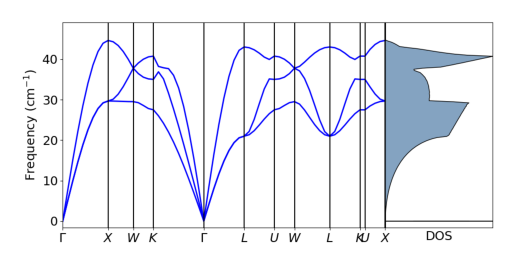

In [ ]:
plt.axis('off')
plt.imshow(plt.imread("phonopy_bands_cu.png"))
plt.show()

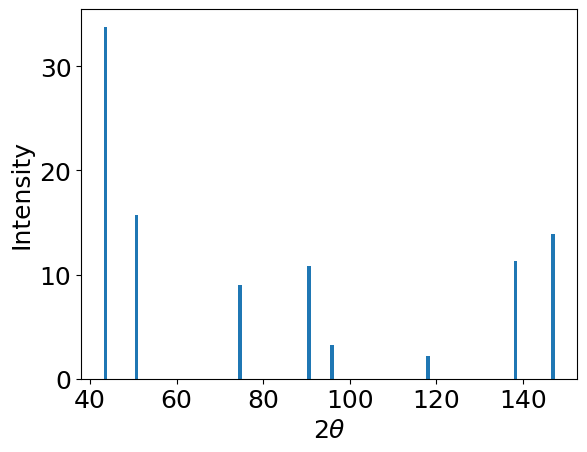

In [ ]:
# x-ray diffraction
two_thetas, d_hkls, intensities = XRD().simulate(atoms=atoms)
plt.bar(two_thetas,intensities)
plt.xlabel(r'2$\theta$')
plt.ylabel('Intensity')
plt.show()

In [ ]:
thermal_prop.keys()

dict_keys(['temperatures', 'free_energy', 'entropy', 'heat_capacity'])

In [ ]:
model_path = wt10_path()
calc = AlignnAtomwiseCalculator(path=model_path)
lattice_params = np.linspace(3.5, 3.8)
fcc_energies = []
ready = True
for a in lattice_params:
    atoms = AseAtoms([Atom('Cu', (0, 0, 0))],
                     cell=0.5 * a * np.array([[1.0, 1.0, 0.0], [0.0, 1.0, 1.0],[1.0, 0.0, 1.0]]),
                     pbc=True)
    atoms.set_tags(np.ones(len(atoms)))
    atoms.calc = calc
    e = atoms.get_potential_energy()
    fcc_energies.append(e)

dir_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10
model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10


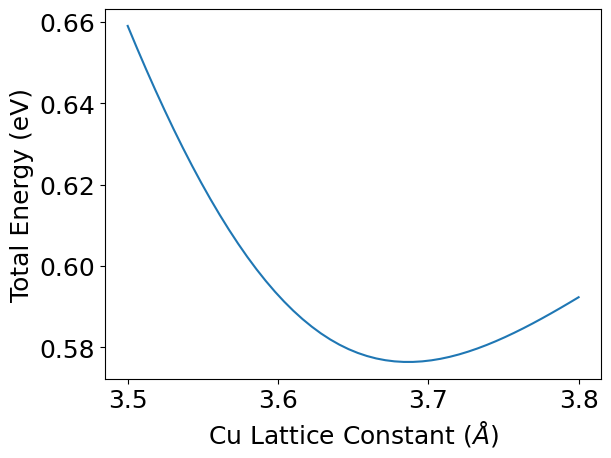

In [ ]:
plt.plot(lattice_params, fcc_energies)
plt.xlabel('Cu Lattice Constant ($\AA$)')
plt.ylabel('Total Energy (eV)')
plt.show()

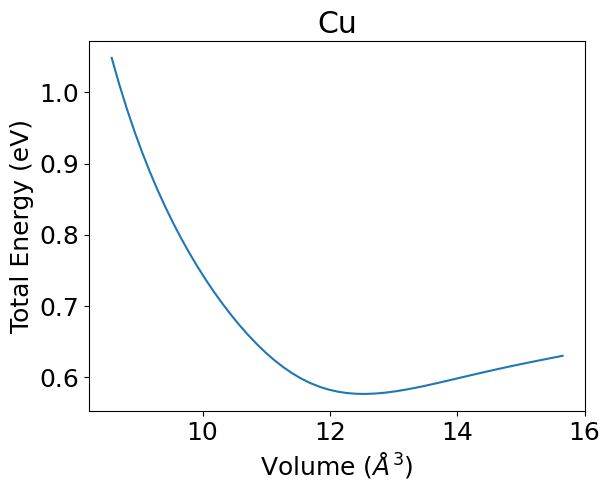

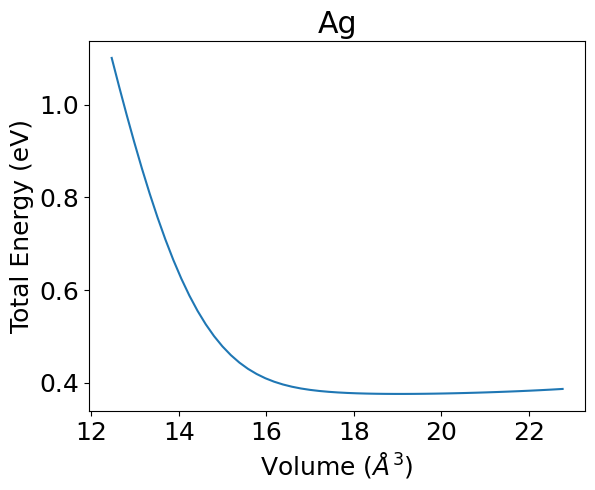

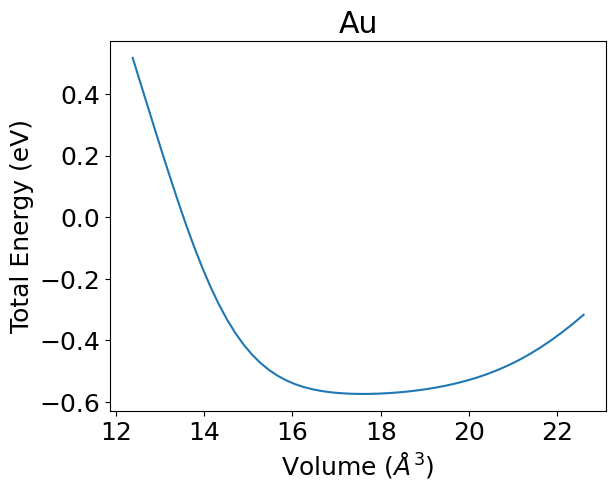

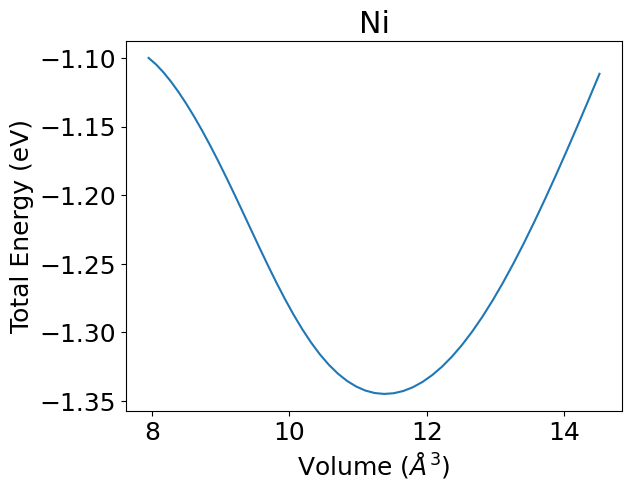

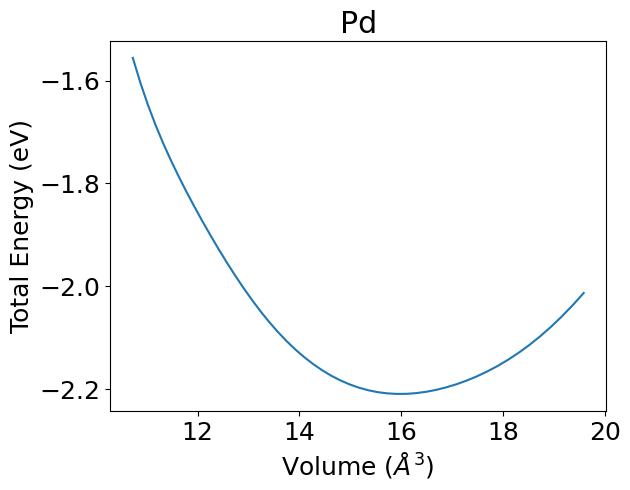

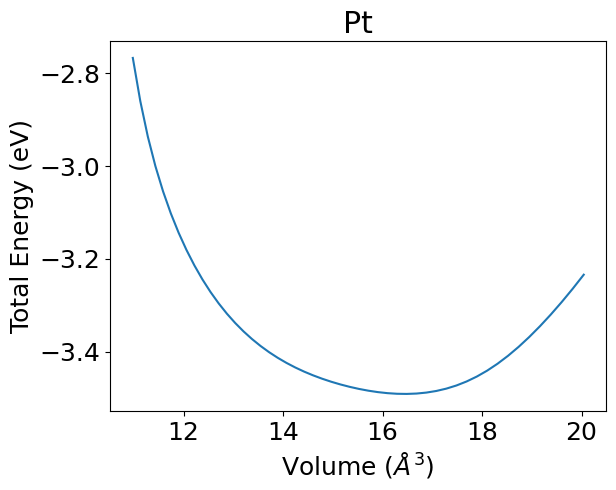

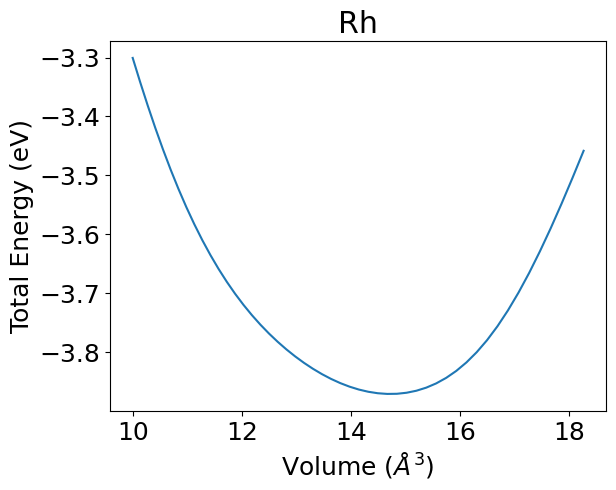

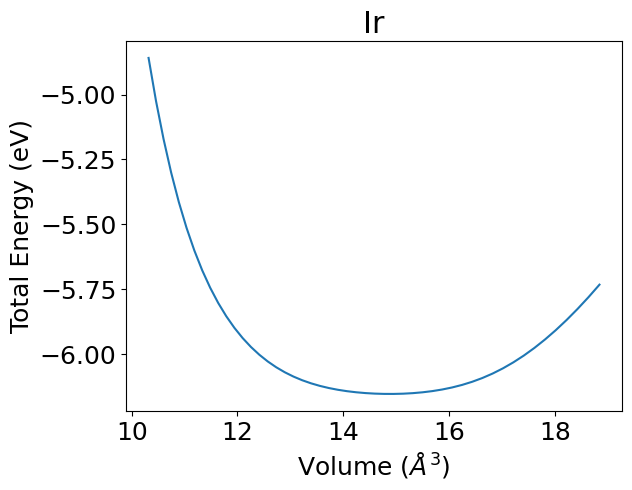

In [ ]:
for metal in ['Cu', 'Ag', 'Au', 'Ni', 'Pd', 'Pt', 'Rh', 'Ir']:
    a = data.reference_states[data.atomic_numbers[metal]]['a']
    lat_cte = np.linspace(0.9 * a, 1.1 * a)
    vols, energies = [], []
    for a in lat_cte:
        atoms = AseAtoms([Atom(metal, (0, 0, 0))],
                      cell=0.5 * a * np.array([[1.0, 1.0, 0.0],
                                               [0.0, 1.0, 1.0],
                                               [1.0, 0.0, 1.0]]),
                     pbc=True)
        atoms.set_tags(np.ones(len(atoms)))
        atoms.calc = calc
        e = atoms.get_potential_energy()
        vols += [atoms.get_volume()]
        energies.append(e)
    plt.figure()
    plt.plot(vols, energies)
    plt.title(metal)
    plt.xlabel('Volume ($\AA^3$)')
    plt.ylabel('Total Energy (eV)');

dir_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_fd
model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_fd


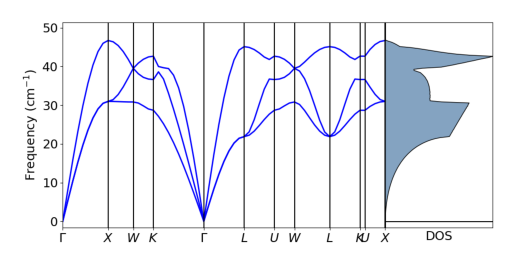

In [ ]:
a = 3.597
atoms = AseAtoms([Atom('Cu', (0, 0, 0))],
              cell=0.5 * a * np.array([[1.0, 1.0, 0.0],
                                        [0.0, 1.0, 1.0],
                                        [1.0, 0.0, 1.0]]),
              pbc=True)
ph_path=fd_path()
ph=phonons(model_path=ph_path, phonopy_bands_figname="phonopy_bands.png", atoms=ase_to_atoms(atoms))
plt.axis('off')
plt.imshow(plt.imread("phonopy_bands.png"))
plt.show()

In [ ]:
ase_to_atoms(atoms)

System
1.0
1.7985 1.7985 0.0
0.0 1.7985 1.7985
1.7985 0.0 1.7985
Cu 
1 
direct
0.0 0.0 0.0 Cu

In [ ]:
!run_alignn_ff.py --file_path POSCAR-JVASP-10.vasp --task="unrelaxed_energy"

dir_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10
model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10
/usr/local/lib/python3.10/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (
Energy(eV) (-11.776981830596924, array([[ 0.0000000e+00,  1.8626451e-09, -3.7252903e-09],
       [ 0.0000000e+00,  2.0768493e-07, -1.7777809e-03],
       [ 0.0000000e+00, -2.0454172e-07,  1.7777213e-03]], dtype=float32))


In [ ]:
!run_alignn_ff.py --file_path POSCAR-JVASP-10.vasp --task="optimize"

dir_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10
model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10
/usr/local/lib/python3.10/dist-packages/alignn/ff/ff.py:472: FutureWarning: Import ExpCellFilter from ase.filters
  self.atoms = ExpCellFilter(self.atoms)
OPTIMIZATION
/usr/local/lib/python3.10/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (
a= 1.678 Ang b= 2.906 Ang c= 6.221 Ang Volume= 60.658 amu/a3 PE=-11.77698 eV KE= 0.00000 eV T= 0.000 K 
a= 1.674 Ang b= 2.900 Ang c= 6.225 Ang Volume= 60.453 amu/a3 PE=-11.77964 eV KE= 0.00000 eV T= 0.000 K 
a= 1.668 Ang b= 2.888 Ang c= 6.235 Ang Volume= 60.057 amu/a3 PE=

In [ ]:
!run_alignn_ff.py --file_path POSCAR-JVASP-10.vasp --task="ev_curve"

dir_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10
model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10
/usr/local/lib/python3.10/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (
E [-11.59964275 -11.74018478 -11.77280188 -11.78283405 -11.78363085
 -11.77698183 -11.76358509 -11.74409294 -11.71869063 -11.68687391]
V [52.00698610745743, 53.66666028373519, 55.3612736919685, 57.09119028249023, 58.85677400563329, 60.6583888117305, 62.496398651114745, 64.3711674741189, 66.28305923107584, 68.23243787231843]


## Train ALIGNN-FF on a New Dataset

In [ ]:
!cd ../
!mkdir Run-01-ForceField
os.chdir("Run-01-ForceField")

In [ ]:
# !wget https://github.com/usnistgov/jarvis/raw/master/jarvis/tests/testfiles/io/vasp/JVASP-86924.xml
# vrun = Vasprun('JVASP-86924.xml')
# vrun.all_forces, vrun.all_structures
# mem=[]
# count=0
# for i in glob.glob("*.xml"):
#     v = Vasprun(i)
#     forces = v.all_forces
#     energies = v.all_energies
#     stresses = v.all_stresses
#     structures = v.all_structures
#     for i, j, k, s in zip(energies, forces, stresses, structures):
#         count += 1
#         jid_c = "scf_" + str(count)
#         info = {}
#         info["jid"] = jid_c
#         info["energy"] = i / s.num_atoms
#         info["forces"] = j.tolist()
#         info["stresses"] = k.tolist()
#         info["atoms"] = s.to_dict()
#         mem.append(info)
# dumpjson(data=mem,filename='id_prop.json')

In [ ]:
!cp -r ../../alignn/examples/sample_data_ff/* ./

In [ ]:
!cp ../../alignn/examples/sample_data_ff/config_example_atomwise.json ./config.json

In [ ]:
!train_alignn.py --root_dir "./" --config "config.json" --output_dir=temp

len dataset 50
MAX val: -24.52653862
MIN val: -42.04135008
MAD: 7.884625411000001
Baseline MAE: 11.991239256250003
data range -24.52653862 -42.04135008
Converting to graphs!
40it [00:00, 45.81it/s]
df        target  ...                                           stresses
0  -29.313096  ...  [[2.88305236, 0.0, 0.0], [0.0, 2.53508705, 0.6...
1  -29.312862  ...  [[3.64327667, 0.0, 0.0], [0.0, 1.66918758, -0....
2  -29.312159  ...  [[4.17873235, 0.0, 0.0], [0.0, 3.03267686, 0.6...
3  -29.312429  ...  [[3.94834115, 0.52115723, -0.58782616], [0.521...
4  -29.312428  ...  [[3.94677973, -0.52114892, 0.58782086], [-0.52...
5  -29.312791  ...  [[4.64789167, 0.0, 0.0], [0.0, 1.74371641, 1.2...
6  -29.311952  ...  [[3.11877316, 0.0, 0.0], [0.0, 3.03565406, -0....
7  -29.311899  ...  [[3.20798041, 0.0, 0.0], [0.0, 2.92951401, 0.8...
8  -29.312800  ...  [[4.59969418, 0.0, 0.0], [0.0, 1.7664801, -0.2...
9  -42.041350  ...  [[0.13527718, 0.0, 0.0], [0.0, 0.13527718, 0.0...
10 -42.002227  ...  [[-44.305

In [ ]:
!ls -altr temp

total 47652
-rw-r--r-- 1 root root       68 Mar 31 23:57 mad
-rw-r--r-- 1 root root      489 Mar 31 23:57 ids_train_val_test.json
drwxr-xr-x 4 root root     4096 Mar 31 23:57 ..
-rw-r--r-- 1 root root       34 Mar 31 23:57 train_data_data_range
-rw-r--r-- 1 root root       34 Mar 31 23:57 val_data_data_range
-rw-r--r-- 1 root root       33 Mar 31 23:57 test_data_data_range
-rw-r--r-- 1 root root     2170 Mar 31 23:57 config.json
-rw-r--r-- 1 root root      204 Mar 31 23:59 history_train.json
-rw-r--r-- 1 root root 16175181 Mar 31 23:59 current_model.pt
-rw-r--r-- 1 root root 16174599 Mar 31 23:59 best_model.pt
-rw-r--r-- 1 root root   179594 Mar 31 23:59 Train_results.json
-rw-r--r-- 1 root root    17862 Mar 31 23:59 Val_results.json
-rw-r--r-- 1 root root      203 Mar 31 23:59 history_val.json
-rw-r--r-- 1 root root    22665 Mar 31 23:59 Test_results.json
drwxr-xr-x 2 root root     4096 Mar 31 23:59 .
-rw-r--r-- 1 root root 16174599 Apr  1 00:00 last_model.pt


## Train a Model for JARVIS-DFT 2D Exfoliation Energy

In [ ]:
os.listdir("../")

['POSCAR-JVASP-107772.vasp',
 'POSCAR-JVASP-28704.vasp',
 'POSCAR-JVASP-90856.vasp',
 'opt.log',
 'POSCAR-JVASP-14014.vasp',
 'POSCAR-JVASP-97677.vasp',
 'phonopy_bands_cu.png',
 'POSCAR-JVASP-42300.vasp',
 'POSCAR-JVASP-21210.vasp',
 'POSCAR-JVASP-64377.vasp',
 'POSCAR-JVASP-86968.vasp',
 'POSCAR-JVASP-28397.vasp',
 'POSCAR-JVASP-98550.vasp',
 'POSCAR-JVASP-89025.vasp',
 'POSCAR-JVASP-50332.vasp',
 'POSCAR-JVASP-89265.vasp',
 'opt.traj',
 'POSCAR-JVASP-98224.vasp',
 'POSCAR-JVASP-64584.vasp',
 'POSCAR-JVASP-97915.vasp',
 'POSCAR-JVASP-65062.vasp',
 'config.json',
 'id_prop.csv',
 'POSCAR-JVASP-90228.vasp',
 'POSCAR-JVASP-14873.vasp',
 'POSCAR-JVASP-97570.vasp',
 'POSCAR-JVASP-64664.vasp',
 'POSCAR-JVASP-98167.vasp',
 'POSCAR-JVASP-90532.vasp',
 'POSCAR-JVASP-28565.vasp',
 'POSCAR-JVASP-98284.vasp',
 'POSCAR-JVASP-97799.vasp',
 'POSCAR-JVASP-48166.vasp',
 'POSCAR-JVASP-86097.vasp',
 'POSCAR-JVASP-28634.vasp',
 'POSCAR-JVASP-1372.vasp',
 'POSCAR-JVASP-10.vasp',
 'POSCAR-JVASP-60702.vasp

In [ ]:
!cd ../../
!mkdir Run-03-2D-Dft
!cd Run-03-2D-Dft

FileNotFoundError: [Errno 2] No such file or directory: '../../Run-03-2D-Dft'

In [ ]:
os.chdir("../Run-03-2D-Dft")

In [ ]:
cwd = os.getcwd() # current working directory
temp_dir_name = "DataDir_ExfoEnergy"
os.makedirs(temp_dir_name)
os.chdir(temp_dir_name)
dft_3d = jdata("dft_3d")
prop = "exfoliation_energy" # "optb88vdw_bandgap"
f = open("id_prop.csv", "w")
for i in dft_3d:
    atoms = Atoms.from_dict(i["atoms"])
    jid = i["jid"]
    poscar_name = "POSCAR-" + jid + ".vasp"
    target = i[prop]
    if target != "na":
        atoms.write_poscar(poscar_name)
        f.write("%s,%6f\n" % (poscar_name, target))
f.close()
os.chdir(cwd)

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


In [ ]:
!ls -altr  DataDir_ExfoEnergy/*.vasp | wc -l

813


In [ ]:
!wc -l DataDir_ExfoEnergy/id_prop.csv

813 DataDir_ExfoEnergy/id_prop.csv


In [ ]:
os.getcwd()

'/content/alignn/Run-00-reg/Run-01-ForceField/Run-03-2D-Dft'

In [ ]:
time_str=time.time()
!train_alignn.py --root_dir "DataDir_ExfoEnergy" --epochs 1 --batch_size 64 --config "/content/alignn/alignn/examples/sample_data/config_example.json" --output_dir="ExfoEnOut"
time_end=time.time()
print ('Time in sec',time_end-time_str)

id_prop_csv_file exists True
len dataset 813
MAX val: 948.93
MIN val: 0.03
MAD: 62.629814227293544
Baseline MAE: 53.28148072174739
data range 948.93 0.03
Converting to graphs!
650it [00:15, 43.00it/s]
df                          jid  target                                              atoms
0       POSCAR-JVASP-10.vasp   83.78  {'lattice_mat': [[1.6777483798834445, -2.90594...
1    POSCAR-JVASP-60702.vasp   88.81  {'lattice_mat': [[9.067075684180468, -0.0, 0.0...
2    POSCAR-JVASP-28397.vasp    0.03  {'lattice_mat': [[0.0, -3.9587610833154616, 0....
3     POSCAR-JVASP-3534.vasp   71.05  {'lattice_mat': [[3.9274082409870625, 0.0, 0.0...
4      POSCAR-JVASP-323.vasp   89.57  {'lattice_mat': [[3.413342172498346, 0.0, 0.0]...
..                       ...     ...                                                ...
645  POSCAR-JVASP-29304.vasp   94.30  {'lattice_mat': [[6.442061375822732, -0.0, 0.0...
646  POSCAR-JVASP-29728.vasp   38.76  {'lattice_mat': [[3.704728408598396, 0.0005419...
647 

In [ ]:
!ls ExfoEnOut

best_model.pt		 last_model.pt			   train_data_data_range
config.json		 mad				   Train_results.json
current_model.pt	 prediction_results_test_set.csv   val_data_data_range
history_train.json	 prediction_results_train_set.csv  Val_results.json
history_val.json	 test_data_data_range
ids_train_val_test.json  Test_results.json


In [ ]:
df = pd.read_csv('ExfoEnOut/prediction_results_test_set.csv')
df

,id,target,prediction
0,POSCAR-JVASP-4657.vasp,57.080002,47.001801
1,POSCAR-JVASP-368.vasp,55.490002,47.031479
2,POSCAR-JVASP-578.vasp,96.629997,46.959553
3,POSCAR-JVASP-9389.vasp,247.889999,47.397129
4,POSCAR-JVASP-4660.vasp,8.220000,47.278667
...,...,...,...
76,POSCAR-JVASP-57459.vasp,253.800003,47.176769
77,POSCAR-JVASP-12888.vasp,52.169998,47.512363
78,POSCAR-JVASP-58999.vasp,234.050003,47.431438
79,POSCAR-JVASP-4645.vasp,100.849998,47.170200


Text(0, 0.5, 'ALIGNN predictions (meV)')

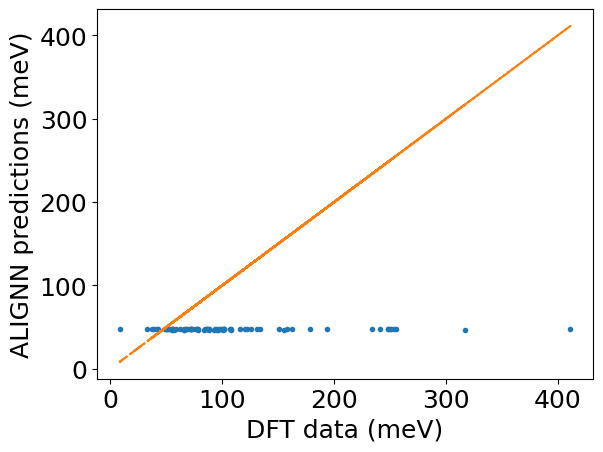

In [ ]:
plt.plot(df['target'],df['prediction'],'.')
plt.plot(df['target'],df['target'],'-.')
plt.xlabel('DFT data (meV)')
plt.ylabel('ALIGNN predictions (meV)')

In [ ]:
# Changing the cut-off in config_example.json as 5, n_train as 110000, n_val as 10000, n_test as 10829:
# from jarvis.db.jsonutils import loadjson, dumpjson
# config = loadjson("alignn/examples/sample_data/config_example.json")
# config['cutoff'] = 5.0
# config['n_train'] = 110000
# config['n_val'] = 10000
# config['n_test'] = 10829
# dumpjson(data=config, filename="config_qm9.json")

In [ ]:
# download vasprun.xml from JARVIS-DFT elastic tensor calculations for Silicon (JVASP-1002)
jid = 'JVASP-1002'
x=get_jid_data(jid=jid,dataset='dft_3d')
for i in x['raw_files']:
  if 'FD-ELAST' in i:
    print(i)
    tmp = i.split(".zip,")[1]
    r = requests.get(tmp)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    vrun_path = z.read("vasprun.xml").decode("utf-8")
    fd, path = tempfile.mkstemp()
    with os.fdopen(fd, "w") as tmp:
        tmp.write(vrun_path)
    vrun_elast = Vasprun(path)
for i in x['raw_files']:
  if 'DFT-SCF' in i:
    print(i)
    tmp = i.split(".zip,")[1]
    r = requests.get(tmp)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    vrun_path = z.read("vasprun.xml").decode("utf-8")
    fd, path = tempfile.mkstemp()
    with os.fdopen(fd, "w") as tmp:
        tmp.write(vrun_path)
    vrun_scf = Vasprun(path)

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.
FD-ELAST,JVASP-1002.zip,https://ndownloader.figshare.com/files/22975514
DFT-SCF,JVASP-1002.zip,https://ndownloader.figshare.com/files/23127296


In [ ]:
x['raw_files']

['FD-ELAST,JVASP-1002.zip,https://ndownloader.figshare.com/files/22975514',
 'DFPT,JVASP-1002.zip,https://ndownloader.figshare.com/files/22941809',
 'OPT-LOPTICS,JVASP-1002.zip,https://ndownloader.figshare.com/files/24035894',
 'OPT-Bandst,JVASP-1002.zip,https://ndownloader.figshare.com/files/23713301',
 'TBMBJ,JVASP-1002.zip,https://ndownloader.figshare.com/files/23571836',
 'DFT-SCF,JVASP-1002.zip,https://ndownloader.figshare.com/files/23127296',
 'WANN,JVASP-1002.zip,https://ndownloader.figshare.com/files/23102750']

In [ ]:
jid='JVASP-1002'
forces = vrun_elast.all_forces
energies = vrun_elast.all_energies
stresses = vrun_elast.all_stresses
structures = vrun_elast.all_structures
count = 0
mem=[]
for i, j, k, s in zip(energies, forces, stresses, structures):
    count += 1
    jid_c = jid + "_elastic_" + str(count)
    info = {}
    info["jid"] = jid_c
    info["energy"] = i / s.num_atoms
    info["forces"] = j.tolist()
    info["stresses"] = k.tolist()
    info["atoms"] = s.to_dict()
    mem.append(info)

In [ ]:
forces = vrun_scf.all_forces
energies = vrun_scf.all_energies
stresses = vrun_scf.all_stresses
structures = vrun_scf.all_structures
count = 0
mem=[]
for i, j, k, s in zip(energies, forces, stresses, structures):
    count += 1
    jid_c = jid + "_scf_" + str(count)
    info = {}
    info["jid"] = jid_c
    info["energy"] = i / s.num_atoms
    info["forces"] = j.tolist()
    info["stresses"] = k.tolist()
    info["atoms"] = s.to_dict()
    mem.append(info)

In [ ]:
dumpjson(data=mem, filename="id_prop.json")